In [4]:
import pschitt.geometry as geo
import numpy as np
import matplotlib.pyplot as plt
import pschitt.sky_objects as sky
import pschitt.camera_image as ci
import pschitt.hillas as hillas
import pschitt.vizualisation as viz
from importlib import reload
import math

In [5]:
%matplotlib inline

In [6]:
shower = sky.shower()

shower.impact_point = np.array([80,60,0])

#shower direction
shower.alt = math.radians(80)
shower.az = math.radians(90)

#pointing direction
talt = math.radians(81)
taz = math.radians(89)

#shower parameters
shower_top = 12000
shower_length = 8000
shower_width = 100

shower.number_of_particles = int(1e4)

In [7]:
shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

In [9]:
tel_normal = geo.altaz_to_normal(talt,taz)
tel1 = geo.Telescope([200,200,0],tel_normal)
tel2 = geo.Telescope([-200,200,0],tel_normal)
tel3 = geo.Telescope([-200,-200,0],tel_normal)
tel4 = geo.Telescope([200,-200,0],tel_normal)
tel5 = geo.Telescope([0,0,0],tel_normal)

alltel = [tel1, tel2, tel3, tel4, tel5]

/Users/thomasvuillaume/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


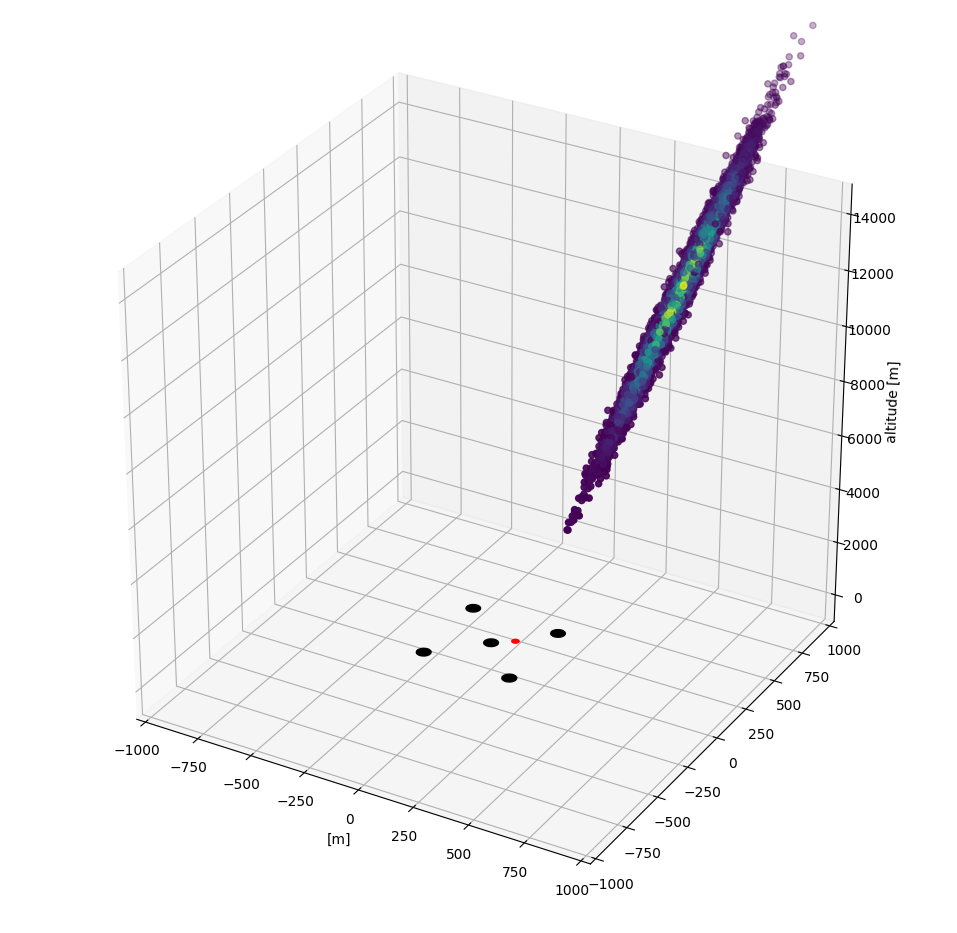

In [10]:
plt.figure(figsize=(9,6))
viz.plot_shower3d(shower, alltel, density_color=True)
# plt.savefig('../Images/ICRC2017/shower3D.eps', fmt='eps', dpi=300)

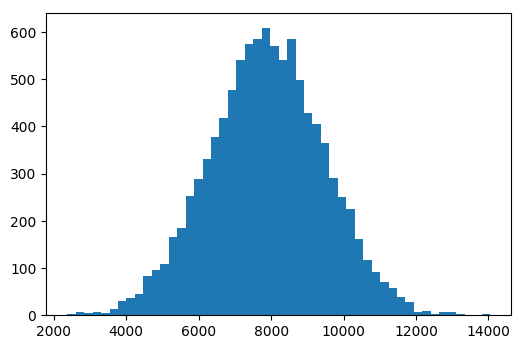

In [11]:
plt.hist(shower.array[:,2], bins=50);

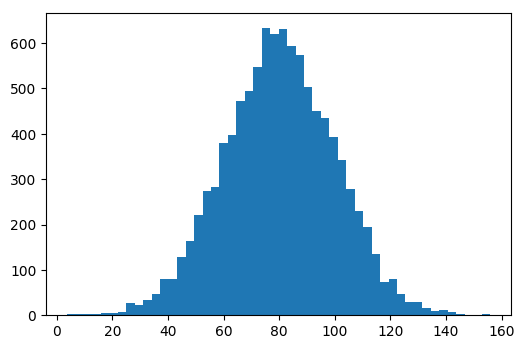

In [12]:
plt.hist(shower.array[:,0], bins=50);

(-250, 250)

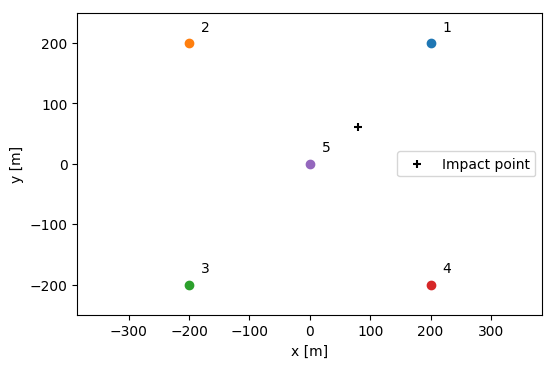

In [13]:
plt.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker="+")

viz.plot_array(alltel)
plt.axis('equal')
plt.ylim(-250,250)

In [63]:
trigger_intensity = 20.
noise = 10
# noise = 0

In [64]:
ci.array_shower_imaging(shower, alltel, noise)

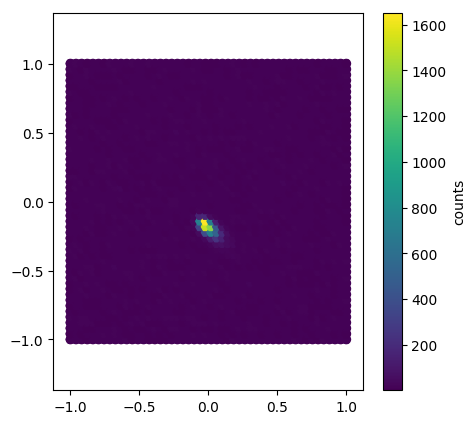

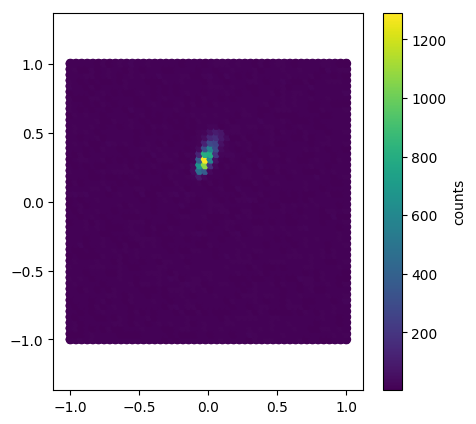

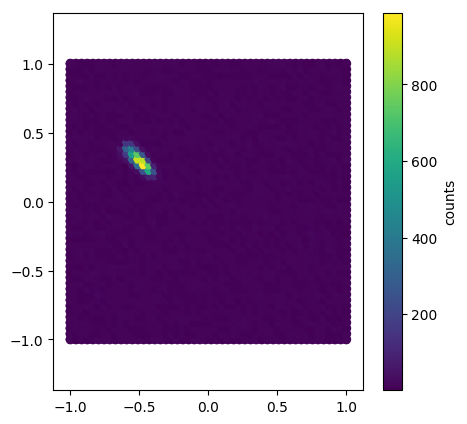

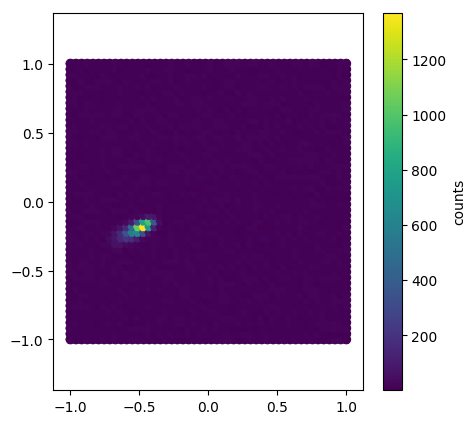

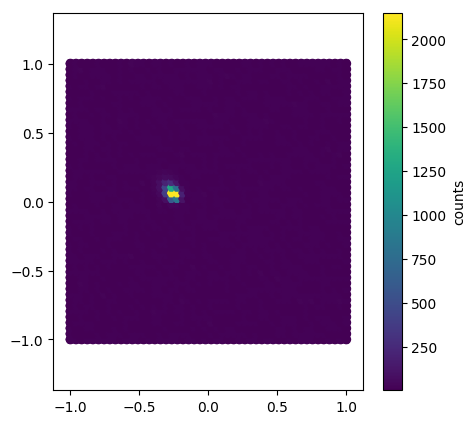

In [65]:
for idx, tel in enumerate(alltel):
    plt.figure(figsize=(5,5))
    viz.display_camera_image(tel)
    plt.scatter(tel.pixel_tab[:,0], tel.pixel_tab[:,1], c = tel.signal_hist, marker='H')
    # plt.clim(5800,6800)
    # plt.savefig('../share/images/example/tel{0}.eps'.format(idx), fmt='eps', dpi=300)

Number of triggered telescopes =  5


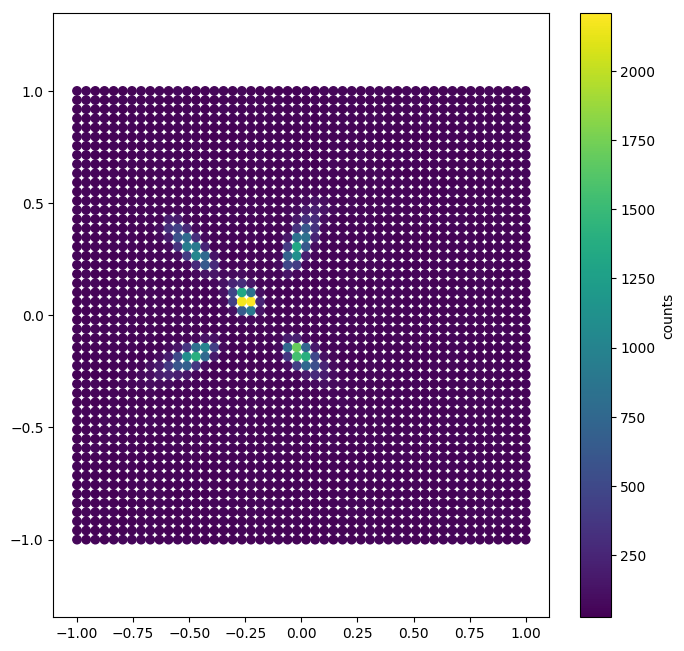

In [67]:
plt.figure(figsize=(8,8))
HP, triggered_telescopes = hillas.array_hillas_parameters(alltel, trigger_intensity)
print("Number of triggered telescopes = ", len(triggered_telescopes))

viz.display_stacked_cameras(triggered_telescopes)

if len(triggered_telescopes)>1:
    pa = hillas.impact_parameter_average(triggered_telescopes, HP)
    p = hillas.impact_parameter_ponderated(triggered_telescopes, HP)

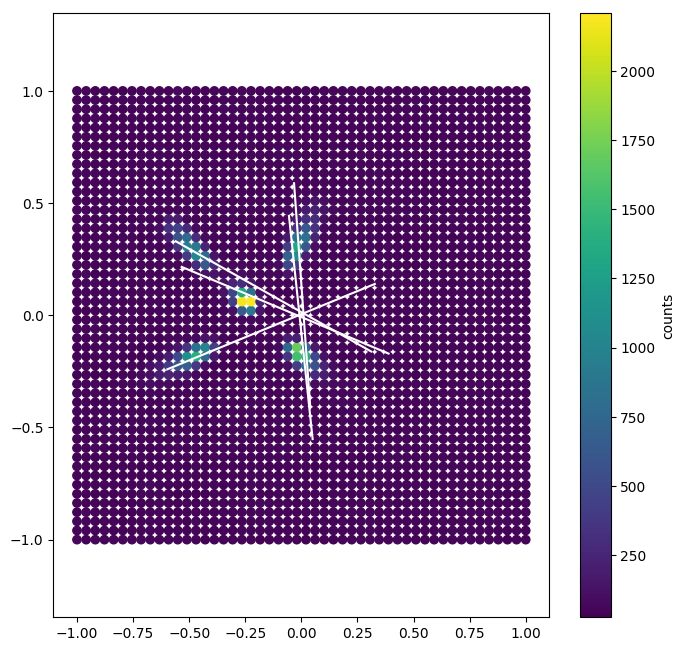

In [68]:
plt.figure(figsize=(8,8))
viz.display_stacked_cameras(alltel)
x = np.linspace(-0.5, 0.5)
for tel, hp in zip(triggered_telescopes, HP):
    plt.plot(hp[1] + x*np.cos(hp[7] + math.pi/2.), hp[2] + x*np.sin(hp[7] + math.pi/2.), color="white")
    plt.axis('equal')
# plt.savefig('../share/images/example/hillas_reco.eps', fmt='eps', dpi=300)

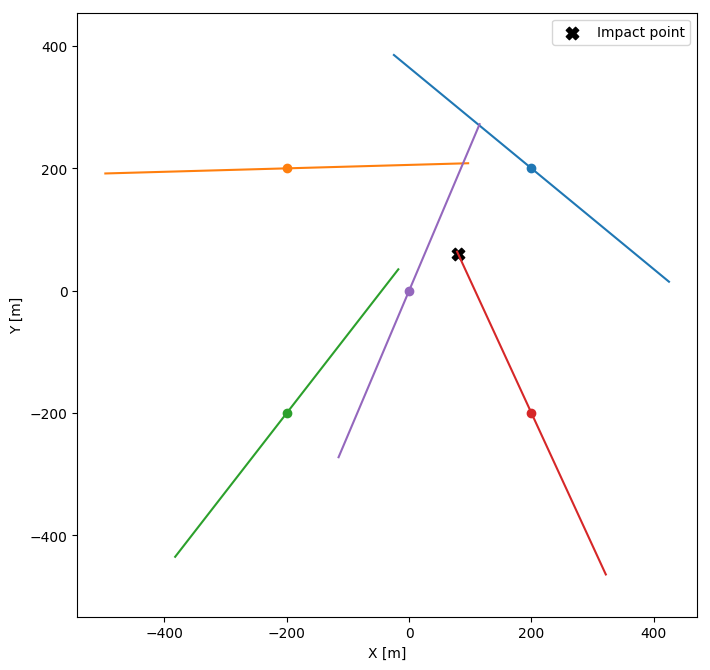

In [36]:
x = np.linspace(-300,300)
HP = np.array(HP)

plt.figure(figsize=(8,8))

plt.axis('equal')
for tel in triggered_telescopes:
    plt.scatter(tel.mirror_center[0], tel.mirror_center[1])
    
for (tel, hp) in zip(triggered_telescopes, HP):
    alt = talt
    az = taz
    psi = hp[7] + np.pi/2.
    n = [
    np.sin(alt)**2 * np.cos(az) * np.cos(psi) - np.sin(alt)*np.sin(az) * np.sin(psi) + np.cos(alt)**2 * np.sin(az)*np.cos(psi),
    np.sin(alt)**2 * np.sin(az) * np.cos(psi) + np.sin(alt)*np.cos(az) * np.sin(psi) - np.cos(alt)**2 * np.cos(az)*np.cos(psi)
    ]
    plt.plot(x*n[0] + tel.mirror_center[0], x*n[1] + tel.mirror_center[1]);

plt.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker='X', s=80)
    
plt.axis('equal')
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.legend()
# plt.savefig("../share/images/example/hillasreco_site.eps", fmt='eps', dpi=300)

In [37]:
if len(triggered_telescopes)>1:
    pa = hillas.impact_parameter_average(triggered_telescopes, HP)
    p = hillas.impact_parameter_ponderated(triggered_telescopes, HP)

In [38]:
if len(triggered_telescopes)>1:
    print("Real impact parameter : ", shower.impact_point)
    print("Reconstruction with simple average = %s \tError = %.2fm" % (pa, math.sqrt(((shower.impact_point-pa)**2).sum())))
    print("Reconstruction with ponderation and cut = %s \tError = %.2fm" % (p, math.sqrt(((shower.impact_point-p)**2).sum())))

Real impact parameter :  [80 60  0]
Reconstruction with simple average = [66.777882610196599, 221.24321642774453, 0.0] 	Error = 161.78m
Reconstruction with ponderation and cut = [54.076102006771308, 241.96604592974595, 0.0] 	Error = 183.80m


In [44]:
(tel.signal_hist - tel.signal_hist.mean()).mean()

-3.2741809263825414e-14